<a href="https://colab.research.google.com/github/heitorabqg/datascientist/blob/master/ex_aula_lms_eco20251014_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para abrir o notebook no Google Colab, altere o domínio `github.com` para `githubtocolab.com`

<div class="alert alert-block alert-danger">
Para praticar programação, é importante que você erre, leia as mensagens de erro e tente corrigí-los.
    
Dessa forma, no Google Colab, é importante que você DESATIVE OS RECURSOS DE AUTOCOMPLETAR:

- Menu Ferramentas -> Configurações
- Na janela que é aberta:
  - Seção Editor -> Desativar "Mostrar sugestões de preenchimento de código com base no contexto"
  - Seção Assistência de IA -> Desabilitar itens

Na versão em inglês:

- Menu Tools -> Settings
- Na janela que é aberta:
  - Seção Editor -> Desativar "Show context-powered code completions"
  - Seção AI Assistance -> Desabilitar itens
</div>

# PSI5892 - Aula de Exercícios

# Cancelamento de eco acústico com o algoritmo NLMS


Considere o seguinte diagrama de blocos, onde:

- $x(n)$ representa amostras de um sinal de voz;
- $v(n)$ é ruído branco gaussiano de média nula e variância $\sigma_v^2$;
- $d(n)$  é a soma do eco (obtido a partir da filtragem do sinal de voz pela resposta ao pulso unitário do ambiente) com o ruído $v(n)$, ou seja: $d(n)=x(n)\ast h(n)+v(n)$ sendo $h(n)$ a resposta ao pulso unitário do ambiente;
- $e(n)$ é o erro definido como $e(n)=d(n)-y(n)$.

<img src="https://github.com/psi5892/exercicios_aula_publico/blob/main/ex_aula_lms_eco/fig_ex_eco_diagrama_blocos.png?raw=1" style="margin:auto"/>

Para que o cancelador de eco acústico tenha um desempenho satisfatório é necessário que o número de
coeficientes do filtro adaptativo satisfaça a seguinte inequação:
$$
MT_a>\tau
$$
sendo $M$ o número de coeficientes do filtro adaptativo, $T_a$ o período de amostragem do sinal de voz e $\tau$ o maior atraso do eco.

Uma curva bastante útil quando se trabalha com cancelamento de eco é a curva ERLE (*echo return loss enhancement*) que mostra a redução de eco em dBs:
$$
{\rm ERLE}(n)=10\log_{10}\Bigg(\frac{{\rm E}\{d^2(n)\}}{{\rm E}\{e^2(n)\}}\Bigg).
$$
Na solução dos exercícios 1), 2) e 3) considere o sinal de voz [`locutor.wav`](./locutor.wav) e a resposta ao pulso unitário armazenada no arquivo [`ri.pkl`](./ri.pkl).

# Exercício 1

Obtenha o sinal de eco, filtrando o sinal de voz pela resposta ao pulso unitário e adicionando a este resultado um ruído branco gaussiano de média zero com desvio padrão $\sigma_v=10^{-4}$. Trace em um mesmo gráfico os sinais $x(n)$ e $d(n)$ com cores diferentes e ouça os sinais.

Procure sempre utilizar vetores coluna representados por *arrays* NumPy de *rank* 2 para armazenar os sinais e utilize a biblioteca `soundfile` para ler o sinal de voz do locutor armazenado no arquivo `locutor.wav`, como no exemplo:

```python
import soundfile as sf

file_path = "locutor.wav"
x, fs = sf.read(file_path)
```
em que `x` é o *array* contendo as amostras do sinal e `fs` é a frequência de amostragem.


Para ler os dados do arquivo com a resposta ao pulso unitário, utilize a biblioteca `pickle`, como no exemplo:
``` python
import pickle
with open('ri.pkl', 'rb') as f:
    ri = pickle.load(f)
```

Para calcular a saída de um filtro FIR, utilize a função [`scipy.signal.lfilter`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html), como no exemplo:
```python
from scipy.signal import lfilter
# A função espera arrays de rank 1 para representar os coeficientes do filtro, por isso foi usado o método squeeze(). axis=0 indica que deseja-se filtrar um sinal representado por um vetor coluna
s = lfilter(ri.squeeze(), 1, x, axis=0)
```

Para ouvir os sinais, utilize o [`IPython.display.Audio`](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html), como no exemplo:

```python
from IPython.display import Audio
# A função espera um array CxN em que C é o número de canais e N o número de amostras
Audio(x.T, rate=fs)
```

Dessa forma, segue a lista de bibliotecas necessárias:

In [1]:
import numpy as np
import soundfile as sf
import pickle

from matplotlib import pyplot as plt
from scipy.signal import lfilter
from IPython.display import Audio

## Resolução

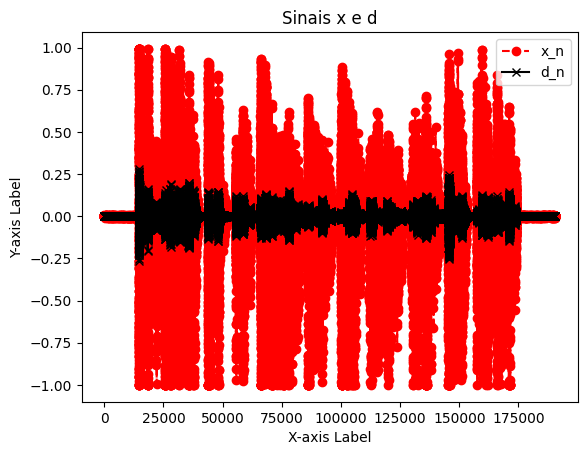


Audio original.



In [2]:
# importou o arquivo de audio
file_path = "locutor.wav"
x, fs = sf.read(file_path)

# importou a resposta ao pulso unitário
with open('ri.pkl', 'rb') as f:
    ri = pickle.load(f)
ri = ri.reshape(-1,1)
# resposta do sinal de entrada x ao filtro de pulso unitario
s = lfilter(ri.squeeze(), 1, x, axis=0)
s = s.reshape(-1,1)

# Na numero de amostras igual ao tamanho do vetor x
Na = x.shape[0]

# desvio padrao do ruido sigma_v = 0.0001
sigma_v = 0.0001

# s_awgn sinal de ruido
v_n = np.random.rand(Na)*sigma_v
v_n = v_n.reshape(-1,1)

# Sinal desejado
d_n = s + v_n

plt.plot( x, color='red', linestyle='--', marker='o', label='x_n')
plt.plot( d_n, color='black', linestyle='-', marker='x', label='d_n')

plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Sinais x e d")
plt.legend()
plt.show() # Displays the plot


# ouvir o audio original
print("\nAudio original.\n")
# A função espera um array CxN em que C é o número de canais e N o número de amostras
Audio(x.T, rate=fs)



# ouvir o audio com eco
#print("\nAudio com eco.\n")
# A função espera um array CxN em que C é o número de canais e N o número de amostras
#Audio(d_n.T, rate=fs)

In [3]:
# ouvir o audio com eco
print("\nAudio com eco.\n")
# A função espera um array CxN em que C é o número de canais e N o número de amostras
Audio(d_n.T, rate=fs)



Audio com eco.



# Exercício 2

Escreva uma função para implementar o algoritmo NLMS com as seguintes entradas e saídas:
```python

def nlms(x, d, M, Nit, etatil, delta):
    """
    Algoritmo NLMS

    Entradas
    x : vetor coluna com o sinal de entrada        
    d : vetor coluna com o sinal desejado        
    M : número de coeficientes do filtro
    Nit : número de iterações a simular (comprimento do sinal de entrada)
    etatil : passo de adaptação        
    delta : fator de regularizaçãofloat        

    Saídas:
    W : matriz (N+1, M) contendo, em cada linha, os coeficientes do filtro para
        uma determinada iteração        
    e : vetor coluna com o sinal de erro
    y : vetor coluna com o sinal de saída        
    """

    # código

    return W, e, y    

```

Em seguida, aplique o algoritmo NLMS com $\tilde{\eta}=0,1$, $\delta=10^{-5}$ e
$M=256$. Ouça os sinais $e(n)$ e $d(n)$. Note que a função `Audio` normaliza o volume do áudio e para desabilitar a normalização, pode ser usado o argumento `normalize=False`. Por fim, trace a curva ERLE para este caso usando a função `erle` fornecida. Considere que são usados blocos de `Nw=1024` amostras dos sinais $e(n)$ e $d(n)$ para estimar cada ponto da curva de ERLE.

In [4]:
def erle(d, e, Nw, fs):
    """
    Function to calculate the Echo Return Loss Enhancement (ERLE)
    after the echo canceller.

    Parameters:
    d : array_like
        Echo signal (desired signal)
    e : array_like
        Residual echo signal (adaptive filter error)
    Nw : int
        Number of samples in the window for echo estimation over time
    fs : int or float
        Sampling frequency

    Returns:
    ERLEdB : ndarray
        ERLE estimate in dB
    """

    N = len(d)
    Nb = N // Nw
    ERLEx = np.zeros(Nb)
    Ta = 1 / fs
    EPS = np.finfo(float).eps

    for i in range(Nb):
        l = slice(Nw * i, Nw * (i + 1))
        ERLEx[i] = np.mean(d[l]**2) / np.mean((e[l] + EPS)**2)

    ERLEdB = 10 * np.log10(ERLEx)

    # Plotting
    t = np.linspace(0, (N-1) * Ta, Nb)
    plt.plot(t, ERLEdB)
    plt.grid(True)
    plt.ylabel('ERLE (dB)')
    plt.xlabel('Time (s)')

    # Plotting d normalized and scaled to fit on the same plot
    td = np.linspace(t[0], t[-1], len(d))
    plt.plot(td, 10 * d / np.max(np.abs(d)) - 11)
    plt.plot([td[0], td[-1]], [-0.5, -0.5], 'k', linewidth=1)

    # Setting y-ticks and axis limits
    plt.yticks(np.arange(0, np.ceil(np.max(ERLEdB)) + 10, 10))
    plt.ylim([-21, np.ceil(np.max(ERLEdB))])
    plt.show()

    return ERLEdB

## Resolução

In [5]:
def nlms(x, d, M, Nit, etatil, delta):
    """
    Algoritmo NLMS

    Entradas
    x : vetor coluna com o sinal de entrada
    d : vetor coluna com o sinal desejado
    M : número de coeficientes do filtro
    Nit : número de iterações a simular (comprimento do sinal de entrada)
    etatil : passo de adaptação
    delta : fator de regularizaçãofloat

    Saídas:
    W : matriz (N+1, M) contendo, em cada linha, os coeficientes do filtro para
        uma determinada iteração
    e : vetor coluna com o sinal de erro
    y : vetor coluna com o sinal de saída
    """

    # código

    # inicializacao do vetor de entradas utilizadas
    #x_nlms_M = np.zeros(M)
    #x_nlms_M = x_nlms_M.reshape(-1,1)

    # Inicializacao das saidas
    # Coeficientes
    W = np.zeros((Nit+1, M))

    # erro
    e = np.zeros((Nit, 1))

    # saida
    y = np.zeros((Nit, 1))

    # loop para pegar todas as entradas de sinal, comeca em M e vai ate Nit-1
    # pois precisa iniciar um vetor de entrada de tamanho M
    for index_nlms in range (M, Nit):

      # vetor x dentro do loop
      #x_nlms_M = np.flip(x[index_nlms-M:index_nlms])
      x_nlms_M = x[index_nlms:index_nlms-M:-1] if index_nlms-M >= 0 else np.flip(x[:index_nlms+1])
      x_nlms_M = np.pad(x_nlms_M, (0, M - len(x_nlms_M)))  # completa com zeros se necessário
      x_nlms_M = x_nlms_M.reshape(M, 1)


      # atualizando Matriz de coeficientes
      w_nlms_M = W[index_nlms, :]
      w_nlms_M =  w_nlms_M.reshape(1,-1)

      # saída do filtro
      y[index_nlms] = np.dot(w_nlms_M, x_nlms_M)

      # erro
      e[index_nlms] = d[index_nlms] - y[index_nlms]

      # atualização dos coeficientes (NLMS)
      energia = delta + np.dot(x_nlms_M.T, x_nlms_M)
      #W[index_nlms+1, :] = W[index_nlms, :] + (etatil / energia) * e[index_nlms] * x_nlms_M.T

      # W[n+1, :] = W[n, :] + (etatil / norm_factor) * e[n] * x_n.T
      W[index_nlms+1,:] = w_nlms_M + (etatil / energia) * e[index_nlms] * x_nlms_M.T
      #W[index_nlms+1,:] = w_nlms_M + (etatil / energia) * e[index_nlms] * x_nlms_M.T.flatten()

    return W, e, y

/tmp/ipython-input-1088301562.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


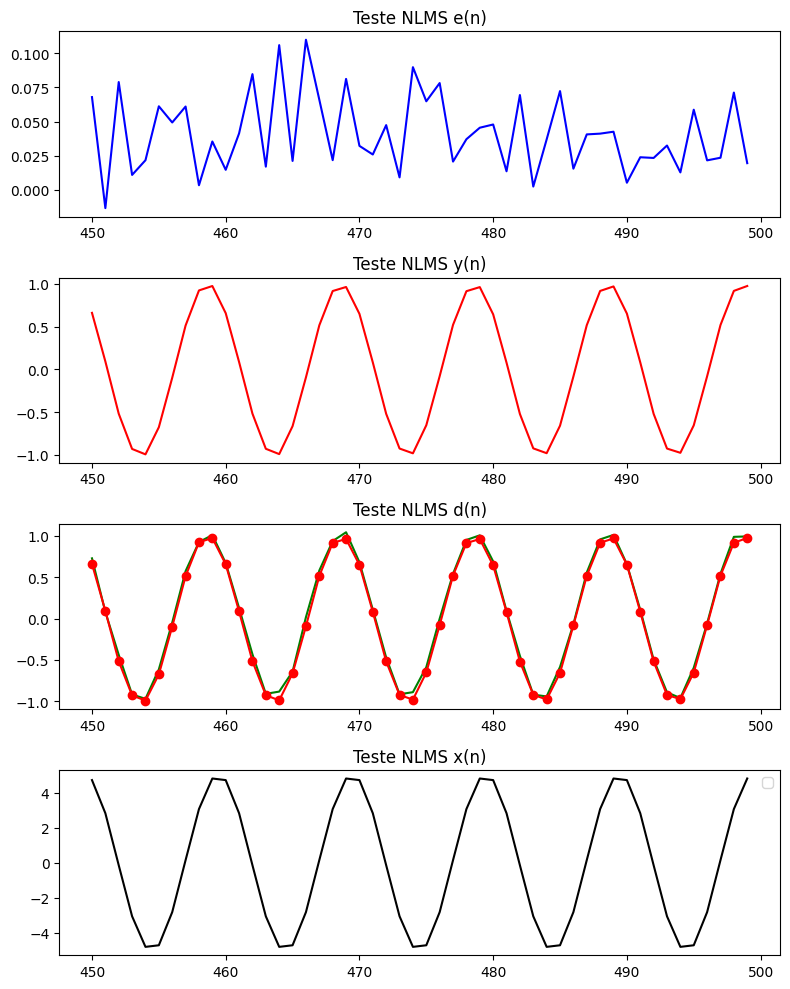


Valores de coeficientes w [ 0.31122387 -0.16880411]


In [20]:
"""
  Teste NLMS
"""

var_s = 0.01

# numero de amostras
Na = 500

n = np.arange(Na)
n = n.reshape(-1,1)

# Novo phi_x é fase aleatória inicial
phi_x_new = np.random.rand(1,1)*2*np.pi

# 𝑥(𝑛)=5sen(2𝜋𝑛/10+𝜙𝑥)
x_new = 5*np.sin(2*np.pi*n/10+phi_x_new)
x_new = x_new.reshape(-1,1)

# 𝑣(𝑛)=sen(2𝜋𝑛/10+𝜋/6+𝜙𝑣)
v_new = np.sin(2*np.pi*n/10+np.pi/6+phi_x_new)
v_new = v_new.reshape(-1,1)

# s : ruido gaussinao com 𝜎^2=0,01
s_new = np.random.rand(Na)*np.sqrt(var_s)
s_new = s_new.reshape(-1,1)

# d: sinal desejado
# d = s + v
d_new = s_new + v_new

etatil = 0.1
delta = 1e-5
Nit = Na
M  = 2
W_t, e_t, y_t = nlms(x_new, d_new, M, Nit, etatil, delta)

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(8, 10))

axs[0].plot(n[-50:], e_t[-50:], color='blue')
axs[0].set_title('Teste NLMS e(n)')

axs[1].plot(n[-50:], y_t[-50:], color='red')
axs[1].set_title('Teste NLMS y(n)')

axs[2].plot(n[-50:], d_new[-50:], color='green')
axs[2].plot(n[-50:], y_t[-50:], color='red', marker='o')
axs[2].set_title('Teste NLMS d(n) e y(n)')

axs[3].plot(n[-50:], x_new[-50:], color='black')
axs[3].set_title('Teste NLMS x(n)')

plt.legend()
plt.tight_layout()
plt.show()

print("\nValores de coeficientes w" , W_t[-1,:])

/tmp/ipython-input-3429616128.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


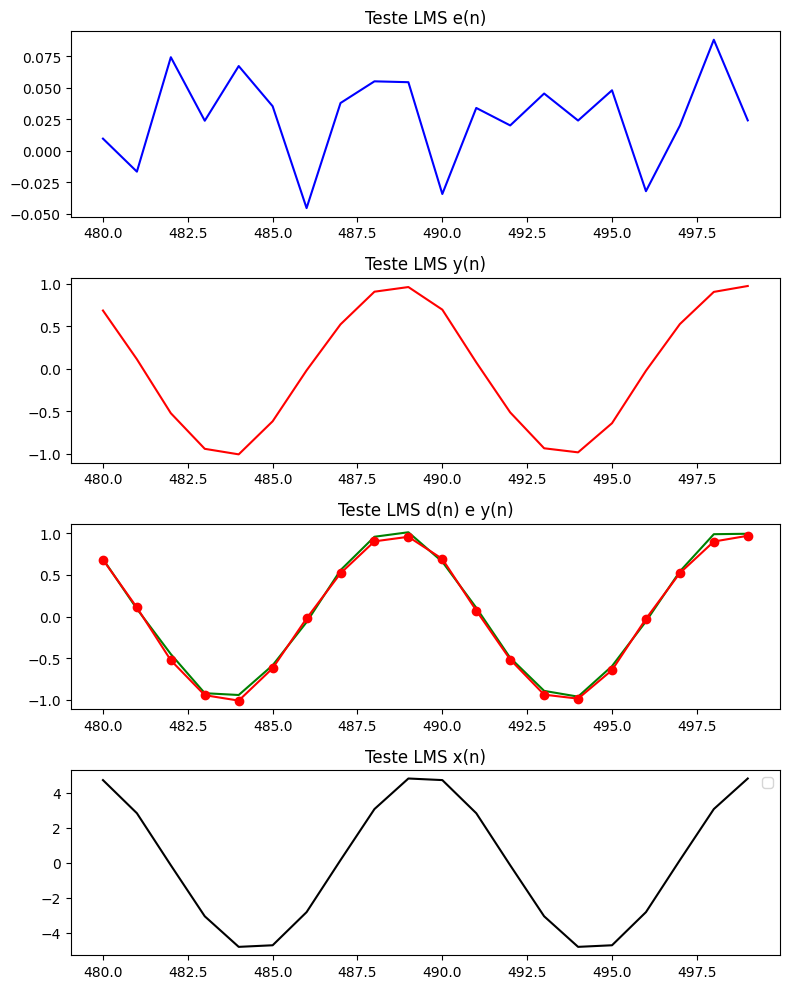


VValores do problema anterior para verificar

Valores de coeficientes w [ 0.31475164 -0.16884436]


In [21]:
"""
  Teste função LMS
"""

def lms_ha(x, d, etha, M):

  # número de amostras
  N_lms = x.shape[0]

  # Inicialização w(0)=0
  w_lms = np.zeros((M, N_lms))

  y_lms = np.zeros(N_lms)
  y_lms = y_lms.reshape(-1,1)

  # vetor com M amostras para entrada (x(n) x(n-1)... x(n-M))
  x_lms_M = np.zeros(M)
  x_lms_M = x_lms_M.reshape(-1,1)

  # vetor erro
  e_lms = np.zeros(N_lms)
  e_lms = e_lms.reshape(-1,1)
  #print("\nDimensao de e_lms", e_lms.shape)

  # filtro temporário
  w_lms_M = np.zeros(2)
  w_lms_M = w_lms_M.reshape(-1,1)


  for index_lms in range (1, N_lms):
    x_lms_M[1:] = x_lms_M[0:M-1]
    x_lms_M[0] = x[index_lms]

    w_lms_M = w_lms[:, index_lms-1]

    y_lms[index_lms] = x_lms_M.T @ w_lms_M

    e_lms[index_lms] = d[index_lms] - y_lms[index_lms]

    w_lms[:,index_lms] = w_lms_M + etha * e_lms[index_lms] * x_lms_M.flatten()


  return y_lms, e_lms, w_lms

# x_new, d_new, M, Nit, etatil, delta

etatil = 0.03

# exemplo de forma de chamar a funcao lms_ha
y_lms, e_lms, w_lms = lms_ha(x_new, d_new, etatil, M)

ig, axs = plt.subplots(nrows=4, ncols=1, figsize=(8, 10))

axs[0].plot(n[-20:], e_lms[-20:], color='blue')
axs[0].set_title('Teste LMS e(n)')

axs[1].plot(n[-20:], y_lms[-20:], color='red')
axs[1].set_title('Teste LMS y(n)')

axs[2].plot(n[-20:], d_new[-20:], color='green', label='d[n]')
axs[2].plot(n[-20:], y_lms[-20:], color='red', marker='o', label='y[n]')
axs[2].set_title('Teste LMS d(n) e y(n)')

axs[3].plot(n[-20:], x_new[-20:], color='black')
axs[3].set_title('Teste LMS x(n)')

plt.legend()
plt.tight_layout()
plt.show()

print("\nVValores do problema anterior para verificar")
print("\nValores de coeficientes w" , w_lms[:,-1])

In [8]:
"""
Em seguida, aplique o algoritmo NLMS com  𝜂̃ =0,1 ,  𝛿=10−5  e  𝑀=256 .
Ouça os sinais  𝑒(𝑛)  e  𝑑(𝑛) .
Note que a função Audio normaliza o volume do áudio e para desabilitar a normalização, pode ser usado o argumento normalize=False.

"""

etatil = 0.1
delta = 1e-5
M = 256
d = d_n
Nit = len(x)

W2, e2, y2 = nlms(x, d, M, Nit, etatil, delta)

# ouvir audio de e(n)
print("\nAudio de e(n)\n")
# A função espera um array CxN em que C é o número de canais e N o número de amostras
Audio(e2.T, rate=fs, normalize=False)


Audio de e(n)



In [9]:
# ouvir audio do erro
print("\nAudio de d(n)\n")
# A função espera um array CxN em que C é o número de canais e N o número de amostras
Audio(d.T, rate=fs, normalize=False)


Audio de d(n)



In [10]:
# ouvir audio do erro
print("\nAudio de y(n)\n")
# A função espera um array CxN em que C é o número de canais e N o número de amostras
Audio(y2.T, rate=fs, normalize=False)


Audio de y(n)



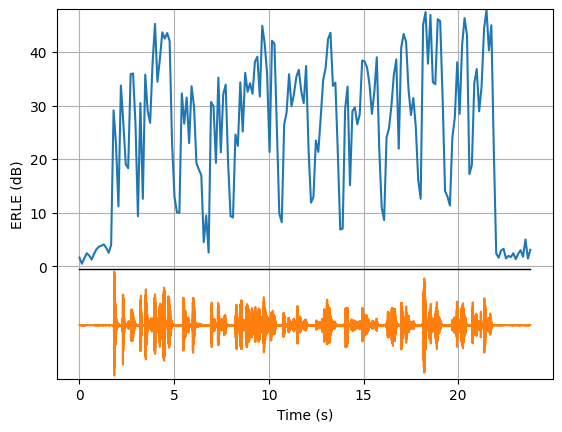

'\nplt.plot( erle2)\nplt.ylabel("(Erle(n) dB)")\nplt.title("Curva de ERLE (echo return loss enhancement)")\nplt.show() # Displays the plot\n'

In [11]:
"""
Por fim, trace a curva ERLE para este caso usando a função erle fornecida.
Considere que são usados blocos de Nw=1024 amostras dos sinais  𝑒(𝑛)  e  𝑑(𝑛)
para estimar cada ponto da curva de ERLE.

"""
Nw = 1024
e = e2

erle2 = erle(d, e, Nw, fs)
"""
plt.plot( erle2)
plt.ylabel("(Erle(n) dB)")
plt.title("Curva de ERLE (echo return loss enhancement)")
plt.show() # Displays the plot
"""

# Exercício 3

*Double Talk*. Suponha agora que em vez de ruído, $v(n)$ seja um outro sinal
de voz [`eng.wav`](https://github.com/psi5892/exercicios_aula_publico/raw/refs/heads/main/eng.wav) não correlacionado com $x(n)$. Utilize então o
algoritmo NLMS com $\tilde{\eta}=0,5$, $\delta=10^{-5}$ e $M=256$,  para cancelar o eco do sinal de voz `locutor.wav` presente no sinal $d(n)$. Ouça os sinais $e(n)$ e $d(n)$. Explique os resultados obtidos.

## Resolução

In [17]:

# importou o arquivo de voz
file_path = "eng.wav"
v3, fs = sf.read(file_path)

# resposta do sinal de entrada x ao filtro de pulso unitario
d3 = x + 0.1*v3


etatil = 0.5
delta = 1e-5
M = 256
d = d3
Nit = len(x)

W3, e3, y3 = nlms(x, d, M, Nit, etatil, delta)

# ouvir audio de e(n)
print("\nExercicio 3 - Audio de e(n)\n")
# A função espera um array CxN em que C é o número de canais e N o número de amostras
Audio(e3.T, rate=fs)


Exercicio 3 - Audio de e(n)



In [13]:
# ouvir audio de d(n)
print("\nExercicio 3 - Audio de d(n)\n")
# A função espera um array CxN em que C é o número de canais e N o número de amostras
Audio(d.T, rate=fs)


Exercicio 3 - Audio de d(n)



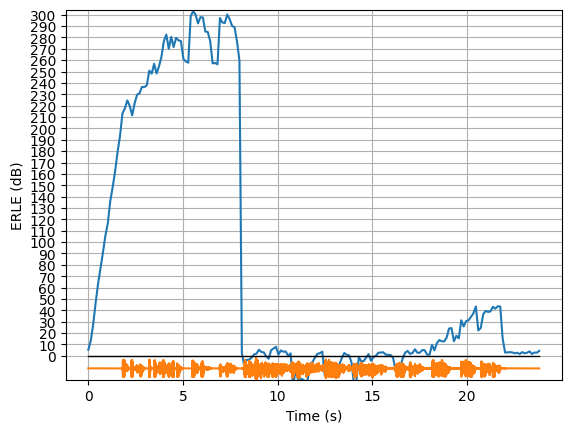

In [14]:
# Verificacao de ERLE

Nw = 1024
e = e3
erle3 = erle(d, e, Nw, fs)

